In [43]:
import numpy as np 
import pandas as pd 

In [44]:
dataset = pd.read_csv('C:\\Users\\MAI\\Downloads\\Task1\\Task1\\insurance.csv')
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [45]:
dataset.info()      #learn the shape of object types of our data >> none of the columns contain any missing values 
dataset.describe()  #show summary statistics for numerical columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [46]:
#Make a new dataset of numeric values only to get the correlation matrix
numeric_dataset = pd.DataFrame()
numeric_dataset['age'] = dataset.age.copy()

sex_values = {'male': 0, 'female': 1}
sex_numeric = dataset.sex.map(sex_values)
numeric_dataset['sex'] = sex_numeric.copy()

numeric_dataset['bmi'] = dataset.bmi.copy()
numeric_dataset['children'] = dataset.children.copy()

smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = dataset.smoker.map(smoker_values)
numeric_dataset['smoker'] = smoker_numeric.copy()

region_values = {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}
region_numeric = dataset.region.map(region_values)
numeric_dataset['region'] = region_numeric.copy()

numeric_dataset['charges'] = dataset.charges.copy()

numeric_dataset


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [47]:
#Correlation matrix between all features
numeric_dataset.corr()

#We can see that 'smoker' feature has the largest correlation with charges, followed by age and then bmi

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,-0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [48]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#Implement a linear regression model with an output based on all features
x = numeric_dataset[['age', 'sex', 'bmi', 'smoker', 'region', 'children']]
y = numeric_dataset['charges']

In [49]:
#Split the dataset into training (70%) and testing (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [50]:
#Get the predicted values of charges
y_predict = model.predict(x_test)

In [51]:
#Calculate r-squared (goodness of line fit)
r_squared = r2_score(y_test, y_predict)

print(f'r-squared = {r_squared:.2f}')

r-squared = 0.77


In [52]:
#Calculate root mean square error (deviation between actual and predicted values)

#Root mean squared error function
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

targets = numeric_dataset.charges
inputs = numeric_dataset[['age', 'sex', 'bmi', 'smoker', 'region', 'children']]
predictions = model.predict(inputs)
print('rsme =', rmse(targets, predictions))

rsme = 6046.957856660924


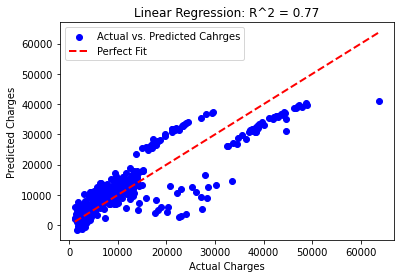

In [53]:
#Plot a R squared line between predicted and actual values
plt.scatter(y_test, y_predict, c='blue', label='Actual vs. Predicted Cahrges')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--', label='Perfect Fit')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title(f"Linear Regression: R^2 = {r_squared:.2f}")
plt.legend()
plt.show()


r-squared = 0.65
rsme = 7466.4382836242


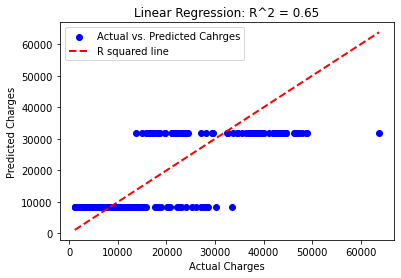

In [54]:
#Implement a single feature linear regression model with an output based on 'smoker' feature only >> same approach but we will change the x

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#Implement a linear regression model with an output based on all features
x = numeric_dataset[['smoker']]
y = numeric_dataset['charges']

#Split the dataset into training (70%) and testing (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

#Get the predicted values of charges
y_predict = model.predict(x_test)

#Calculate r-squared (goodness of line fit)
r_squared = r2_score(y_test, y_predict)

print(f'r-squared = {r_squared:.2f}')


#Calculate root mean square error (deviation between actual and predicted values)

#Root mean squared error function
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

targets = numeric_dataset.charges
inputs = numeric_dataset[['smoker']]
predictions = model.predict(inputs)
print('rsme =', rmse(targets, predictions))

#Plot a R squared line between predicted and actual values
plt.scatter(y_test, y_predict, c='blue', label='Actual vs. Predicted Cahrges')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--', label='R squared line')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title(f"Linear Regression: R^2 = {r_squared:.2f}")
plt.legend()
plt.show()

r-squared = 0.10
rsme = 11553.074311338847


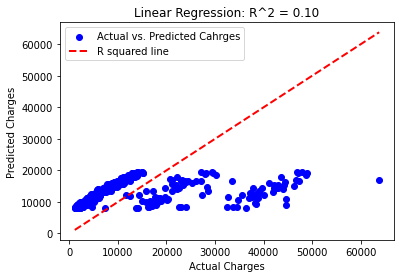

In [55]:
#Implement a single feature linear regression model with an output based on 'age' feature only >> same approach but we will change the x

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#Implement a linear regression model with an output based on all features
x = numeric_dataset[['age']]
y = numeric_dataset['charges']

#Split the dataset into training (70%) and testing (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

#Get the predicted values of charges
y_predict = model.predict(x_test)

#Calculate r-squared (goodness of line fit)
r_squared = r2_score(y_test, y_predict)

print(f'r-squared = {r_squared:.2f}')


#Calculate root mean square error (deviation between actual and predicted values)

#Root mean squared error function
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

targets = numeric_dataset.charges
inputs = numeric_dataset[['age']]
predictions = model.predict(inputs)
print('rsme =', rmse(targets, predictions))

#Plot a R squared line between predicted and actual values
plt.scatter(y_test, y_predict, c='blue', label='Actual vs. Predicted Cahrges')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--', label='R squared line')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title(f"Linear Regression: R^2 = {r_squared:.2f}")
plt.legend()
plt.show()

In [56]:
#Conclusion: the accuracy decreased in single feature LR although the feature has high correlation with the output

In [57]:
#Implement a linear regression model from scratch

import numpy as np
import matplotlib.pyplot as plt

#input X and output Y
X = numeric_dataset[['age', 'sex', 'bmi', 'smoker', 'region', 'children']]
Y = numeric_dataset['charges']


In [58]:
#Implement a function for splitting data into training and testing samples
def my_train_test_split(X, Y, test_size=0.3, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    data_count = len(X)
    test_count = int(test_size * data_count)
    
    #Select test indices randomly without replacement
    test_indices = np.random.choice(data_count, test_count, replace=False)

    #Set difference function to get train indeces
    train_indices = np.setdiff1d(np.arange(data_count), test_indices)

    #Split data into training and testing
    X_train, Y_train = X.iloc[train_indices], Y.iloc[train_indices]
    X_test, Y_test = X.iloc[test_indices], Y.iloc[test_indices]

    return X_train, X_test, Y_train, Y_test

In [59]:
#Split the dataset into training (70%) and testing (30%)

X_train, X_test, Y_train, Y_test = my_train_test_split(X, Y, test_size=0.3, random_state=42)

In [60]:
#Implement linear regression function 
def my_linear_regression(X, Y):
    #Add a column of ones for the intercept
    X = np.c_[np.ones(X.shape[0]), X]

    #Calculate coeffs using closed-form solution by calculating the inverse matrix of multiplication between the 'transpose of the x matrix' and 'x', multiplied by the multiplication between 'transpose of x' and 'y'
    coef = np.linalg.inv(X.T @ X) @ (X.T @ Y)
    
    #Return the intercept and feature coefficients
    return coef[0], coef[1:]

In [61]:
intercept, coefficients = my_linear_regression(X_train, Y_train)

In [62]:
#Function to predict values of charges
def Predict(X, intercept, coefficients):
    #Return the charges predicted values
    return intercept + X @ coefficients

In [63]:
#Get predictions of the testing data
Y_predict = Predict(X_test, intercept, coefficients)

In [64]:
# Calculate R-squared >> the same equation given in the section
def my_r2(Y_true, Y_pred):
    #Calculate sum of squared residuals
    ssr = np.sum((Y_true - Y_pred) ** 2)
    #Calculate sum of total sum of squares
    sst = np.sum((Y_true - np.mean(Y_true)) ** 2)
    return 1 - (ssr / sst)

In [65]:
#Calculate R^2 for the charges 
R_squared = my_r2(Y_test, Y_predict)
print(f'R-squared = {R_squared:.2f}')

R-squared = 0.77


In [66]:
#Conclusion: same R^2 score as of sklearn implementation

In [67]:
# Calculate root mean square error (deviation between actual and predicted values)
def RMSE(Targets, Predictions):
    return np.sqrt(np.mean(np.square(Targets - Predictions)))

Targets = numeric_dataset['charges']
Predictions = Predict(X, intercept, coefficients)
print('RMSE =', RMSE(Targets, Predictions))

RMSE = 6046.982169632892


In [68]:
#Conclusion: same rmse as of sklearn implementation

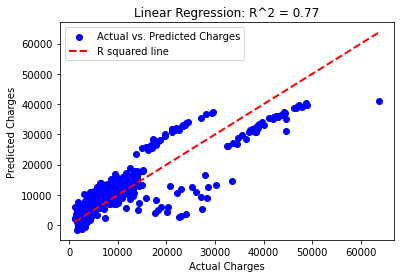

In [69]:
#Plot a R squared line between predicted and actual values
plt.scatter(Y_test, Y_predict, c='blue', label='Actual vs. Predicted Charges')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', lw=2, linestyle='--', label='R squared line')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title(f"Linear Regression: R^2 = {R_squared:.2f}")
plt.legend()
plt.show()